Conjunto de Datos de Kaggle [Sign Language MNIST](https://www.kaggle.com/datamunge/sign-language-mnist) enfocado a clasificación de imágenes


# Importar bibliotecas

In [1]:
import numpy as np
import pandas as pd
from skimage import io

import matplotlib.pyplot as plt
import seaborn as sns

# Explorar una imágen png

In [2]:
imagen = io.imread('../Datos/sign-language-mnist/amer_sign2.png')
print(imagen.shape)

(471, 665, 4)


* ¿cuántos pixeles tiene la imágen?
* ¿es a color o está en escala de grises?
* ¿cuántos canales tiene?
* ¿Qué significa el cuarto canal llamado "alfa"?


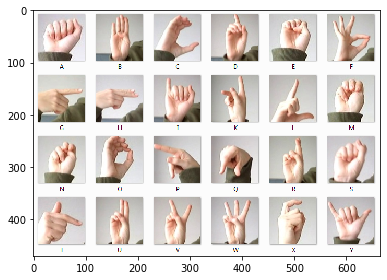

In [3]:
io.imshow(imagen)
plt.show()

In [4]:
#profundida del color 

print(imagen.min())
print(imagen.max())

0
255


## Dividir imagen por canales

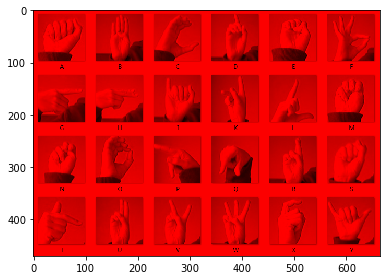

In [5]:
#los rojos están en primer canal, es necesario eliminar los otros dos
rojo = imagen.copy()  
rojo[:, :, 1] = 0
rojo[:, :, 2] = 0

io.imshow(rojo)
plt.show()

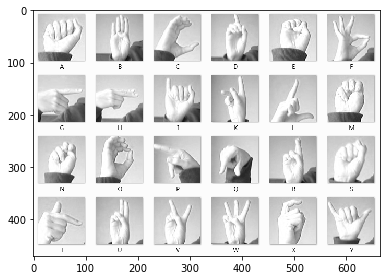

In [6]:
# ¿por qué no es lo mismo que tomar solo un canal:
io.imshow(imagen[:,:,0])
#¿por qué?

In [7]:
imagen[:,:,0].shape

(471, 665)

Ejercicio:

1. obtener la imagen considerando solo el canal verde (segundo canal)
2. obtener la imagen considerando solo el canal azul (tercer canal)

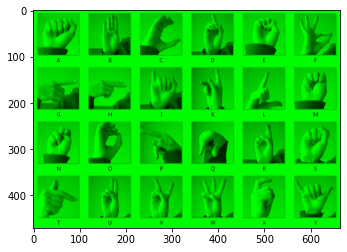

In [8]:
verde=imagen.copy()
verde[:,:,[0,2]] = 0
plt.imshow(verde)

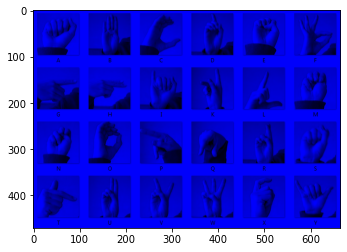

In [9]:
azul=imagen.copy()
azul[:,:,[0,1]] = 0
plt.imshow(azul)

# Vectores de imágenes

In [10]:
vectores = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/Algebra_lineal-para-ML/main/Datos/sign-language-mnist/sign_mnist_test.csv')
print(vectores.shape)
vectores.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [12]:
imagen1 = vectores.iloc[0,1:].to_numpy()
print(imagen1.shape)
imagen1

(784,)


array([149, 149, 150, 150, 150, 151, 151, 150, 151, 152, 152, 152, 152,
       152, 153, 153, 151, 152, 152, 153, 152, 152, 151, 151, 150, 150,
       150, 149, 150, 150, 150, 152, 152, 151, 152, 152, 152, 152, 152,
       153, 154, 153, 154, 154, 153, 154, 153, 154, 153, 153, 152, 152,
       152, 151, 150, 151, 150, 151, 151, 152, 152, 152, 153, 153, 152,
       152, 152, 153, 154, 154, 155, 155, 154, 154, 155, 155, 155, 155,
       154, 153, 153, 151, 151, 152, 150, 151, 151, 152, 152, 152, 154,
       154, 154, 154, 154, 153, 154, 155, 156, 157, 157, 156, 155, 156,
       155, 154, 154, 155, 152, 154, 153, 153, 151, 152, 152, 152, 154,
       154, 154, 154, 154, 155, 157, 156, 156, 156, 154, 150, 146, 147,
       146, 147, 143, 137, 126, 126, 142, 139, 152, 154, 152, 153, 153,
       154, 154, 155, 154, 155, 155, 154, 153, 150, 144, 143, 145, 139,
       142, 144, 157, 157, 147, 139, 128, 119, 130, 113, 147, 156, 151,
       153, 153, 155, 155, 156, 155, 152, 145, 139, 141, 141, 14

C:\Users\Erick\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


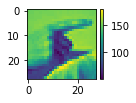

In [13]:
fig= plt.figure(figsize=(2,2))
imagen1 = imagen1.reshape(28,28)
io.imshow(imagen1, cmap='Greys_r')
plt.show()

In [16]:
num5=vectores.iloc[1, 1:].to_numpy()
print(num5.shape)

(784,)


In [17]:
num5

array([126, 128, 131, 132, 133, 134, 135, 135, 136, 138, 137, 137, 138,
       138, 139, 137, 142, 140, 138, 139, 137, 137, 136, 135, 134, 133,
       134, 132, 129, 132, 134, 135, 135, 137, 139, 139, 139, 140, 141,
       141, 142, 143, 142, 142, 116, 138, 141, 140, 141, 140, 139, 138,
       137, 136, 136, 134, 133, 135, 138, 139, 139, 141, 142, 143, 142,
       143, 145, 145, 143, 145, 145, 158,  94, 118, 151, 143, 144, 144,
       142, 141, 141, 140, 139, 138, 137, 139, 142, 142, 142, 144, 146,
       146, 146, 147, 147, 147, 148, 117, 128, 168, 101,  98, 157, 146,
       147, 146, 146, 145, 144, 143, 142, 141, 140, 142, 145, 146, 147,
       148, 149, 149, 149, 151, 151, 149, 161, 114,  99, 174,  99,  84,
       162, 149, 151, 149, 148, 147, 146, 146, 145, 144, 143, 145, 149,
       150, 150, 151, 153, 153, 154, 153, 154, 152, 167, 126,  88, 169,
        99,  87, 164, 152, 153, 152, 151, 150, 149, 148, 148, 147, 145,
       147, 151, 152, 153, 155, 155, 155, 151, 154, 158, 155, 17

In [ ]:
num5=num5.reshape((28,28))

Referencias:

https://es.wikipedia.org/wiki/Portable_Network_Graphics